# Retail Price Optimization with Python | Regression
Retail price optimization is the process of setting the best possible prices for products or services to achieve maximum revenue and profitability.

In this notebook, I will guide you through how to approach Retail Price Optimization using Machine Learning techniques in Python.

## Understanding Retail Price Optimization
Retail price optimization is the process of determining the best price point for products to achieve maximum revenue and profitability.

The goal is to set prices that not only boost earnings but also appeal to customers, encouraging them to make purchases. This approach relies on analyzing data and applying pricing strategies to identify the price that balances profit and customer demand.

To perform retail price optimization, you need access to data on product prices and all factors that influence pricing decisions. For this project, I have selected a suitable dataset, which you can download from [this link](https://statso.io/retail-price-optimization-case-study/).

## Notebook Overview
1. **Data Loading**: Load the dataset and perform initial exploration to understand its structure and contents.
2. **EDA (Exploratory Data Analysis)**: Analyze the data to identify patterns, trends, and relationships between variables.
3. **Feature Engineering**: Create new features or modify existing ones to improve model performance.
4. **Data Preprocessing**: Prepare the data for modeling, including handling categorical variables, scaling, and splitting into training and testing sets.
5. **Modeling**: Train various regression models to predict optimal prices and evaluate their performance.
6. **Evaluation**: Assess model performance using appropriate metrics and select the best-performing model.
7. **Conclusion**: Summarize findings and suggest potential next steps for further analysis or optimization.

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from tqdm.notebook import tqdm
from sklearn.metrics import r2_score, mean_squared_error

import joblib
import warnings

### Configuration

- `pd.set_option('display.max_columns', 50)`: Ensures that up to 50 columns are displayed when viewing DataFrames, making it easier to inspect wide datasets.
- `plt.rcParams['figure.figsize'] = (12,8)`: Sets the default size for all matplotlib figures to 12x8 inches, providing clearer and larger visualizations.
- `warnings.filterwarnings('ignore')`: Suppresses warning messages to keep the output clean and focused on important information.

In [2]:
pd.set_option('display.max_columns', 50)
plt.rcParams['figure.figsize'] = (12,8)
warnings.filterwarnings('ignore')

## 1. Data Loading
Load the dataset using pandas and display the first few rows to understand its structure.

### Read the data

I can read the data with pandas `read_csv` function. The dataset is in CSV format.

In [3]:
df = pd.read_csv('retail_price.csv')

Display the first 5 rows of the dataset.

In [4]:
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,350,4.0,57,23,8,1,5,2017,10.267394,3800,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,350,4.0,61,22,8,1,6,2017,6.503115,3800,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,350,4.0,123,21,10,1,7,2017,12.071651,3800,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,350,4.0,90,23,8,1,8,2017,9.293873,3800,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,350,4.0,54,21,9,1,9,2017,5.555556,3800,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


First, let's check null values in the dataset.

In [5]:
df.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

Display info of the dataset to see data types and non-null counts.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

Now let's check statistical summary of the dataset.

In [7]:
df.describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,weekday,weekend,holiday,month,year,s,volume,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,14.495562,1422.708728,20.682270,106.496800,48.720414,767.399408,1.994083,1847.498521,4.085503,81.028107,21.773669,8.658284,1.494083,6.192308,2017.525148,14.644970,10664.627219,79.452054,4.159467,18.597610,92.930079,4.123521,18.620644,84.182642,4.002071,17.965007,107.399684
std,15.443421,1700.123100,10.081817,76.182972,9.420715,655.205015,1.420473,2274.808483,0.232021,62.055560,0.986104,0.705600,0.940430,3.243455,0.499737,11.930276,9172.801850,47.933358,0.121652,9.406537,49.481269,0.207189,6.424174,47.745789,0.233292,5.533256,76.974657
min,1.000000,19.900000,0.000000,19.900000,29.000000,100.000000,1.000000,100.000000,3.300000,1.000000,20.000000,8.000000,0.000000,1.000000,2017.000000,0.484262,640.000000,19.900000,3.700000,0.095439,19.900000,3.300000,4.410000,19.900000,3.500000,7.670000,19.850000
25%,4.000000,333.700000,14.761912,53.900000,40.000000,339.000000,1.000000,348.000000,3.900000,34.000000,21.000000,8.000000,1.000000,3.000000,2017.000000,7.510204,3510.000000,49.910000,4.100000,13.826429,53.900000,4.100000,14.485000,53.785714,3.900000,15.042727,55.668750
50%,10.000000,807.890000,17.518472,89.900000,51.000000,501.000000,1.500000,950.000000,4.100000,62.000000,22.000000,9.000000,1.000000,6.000000,2018.000000,11.316760,8000.000000,69.900000,4.200000,16.618984,89.990000,4.200000,16.811765,59.900000,4.000000,16.517110,89.900000
75%,18.000000,1887.322500,22.713558,129.990000,57.000000,903.000000,2.000000,1850.000000,4.200000,116.000000,23.000000,9.000000,2.000000,8.000000,2018.000000,17.745704,15750.000000,104.256549,4.200000,19.732500,117.888889,4.200000,21.665238,99.990000,4.100000,19.447778,129.990000
max,122.000000,12095.000000,79.760000,364.000000,60.000000,3006.000000,8.000000,9750.000000,4.500000,339.000000,23.000000,10.000000,4.000000,12.000000,2018.000000,100.000000,32736.000000,349.900000,4.500000,57.230000,349.900000,4.400000,57.230000,255.610000,4.400000,57.230000,364.000000


## 2. Exploratory Data Analysis (EDA)
In this section, I will perform exploratory data analysis (EDA) to understand the dataset better and identify any patterns or relationships that may be useful for building a predictive model.

This code visualizes the distribution of the `total_price` variable in the dataset using a histogram with a kernel density estimate (KDE). The plot helps to understand the spread and skewness of total prices, which is useful for identifying patterns or outliers in the data.

- `sns.histplot`: Plots a histogram of `total_price` with 40 bins and overlays a KDE curve for smooth distribution visualization.
- `color='g'`: Sets the histogram color to green.
- `plt.title`: Adds a descriptive title to the plot.
- `plt.tight_layout()`: Adjusts the layout to prevent overlap of plot elements.

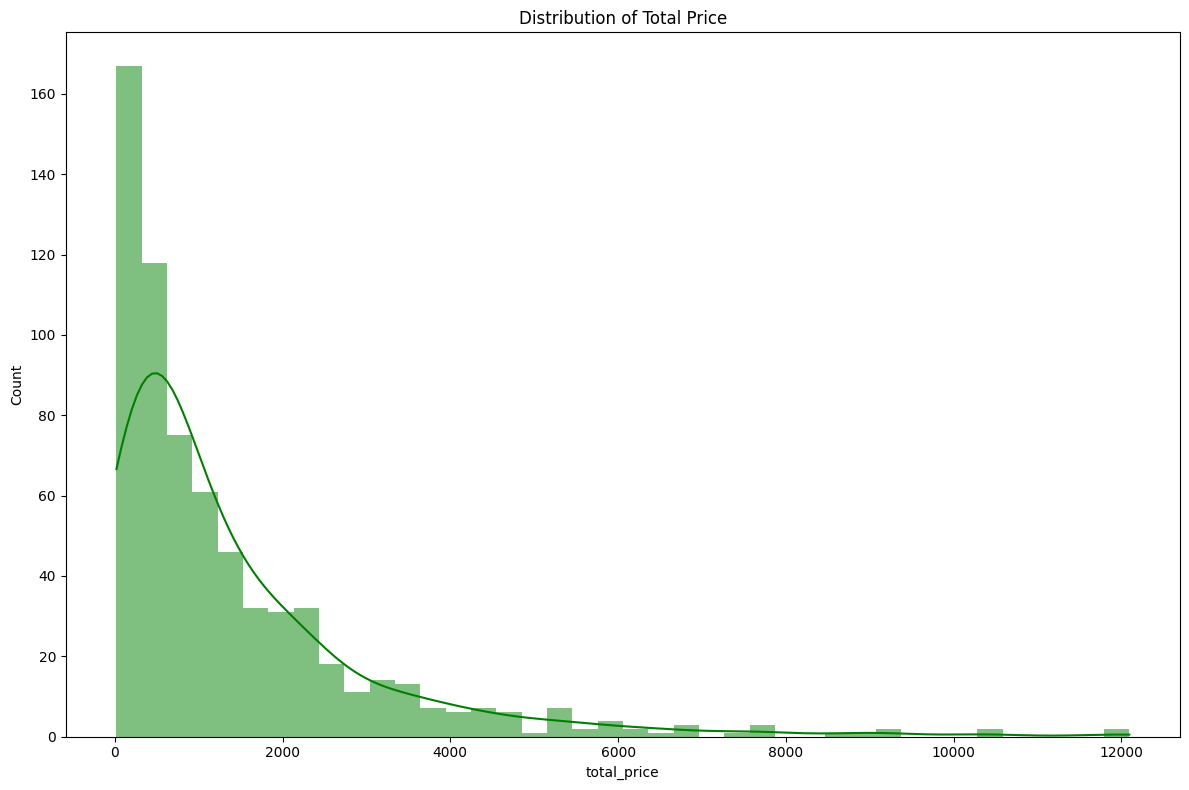

In [8]:
sns.histplot(
    df,
    x='total_price',
    kde=True,
    bins=40,
    color='g',
    edgecolor=None
)
plt.title('Distribution of Total Price')
plt.tight_layout()

This code creates a box plot to visualize the distribution of the `unit_price` variable in the dataset. Box plots are useful for identifying outliers, the median, and the spread of the data.

- `sns.boxplot(df, x='unit_price')`: Plots a box plot for the `unit_price` column.
- `plt.title('Box Plot of Unit Price')`: Adds a title to the plot.
- `plt.tight_layout()`: Adjusts the layout to prevent overlapping elements.

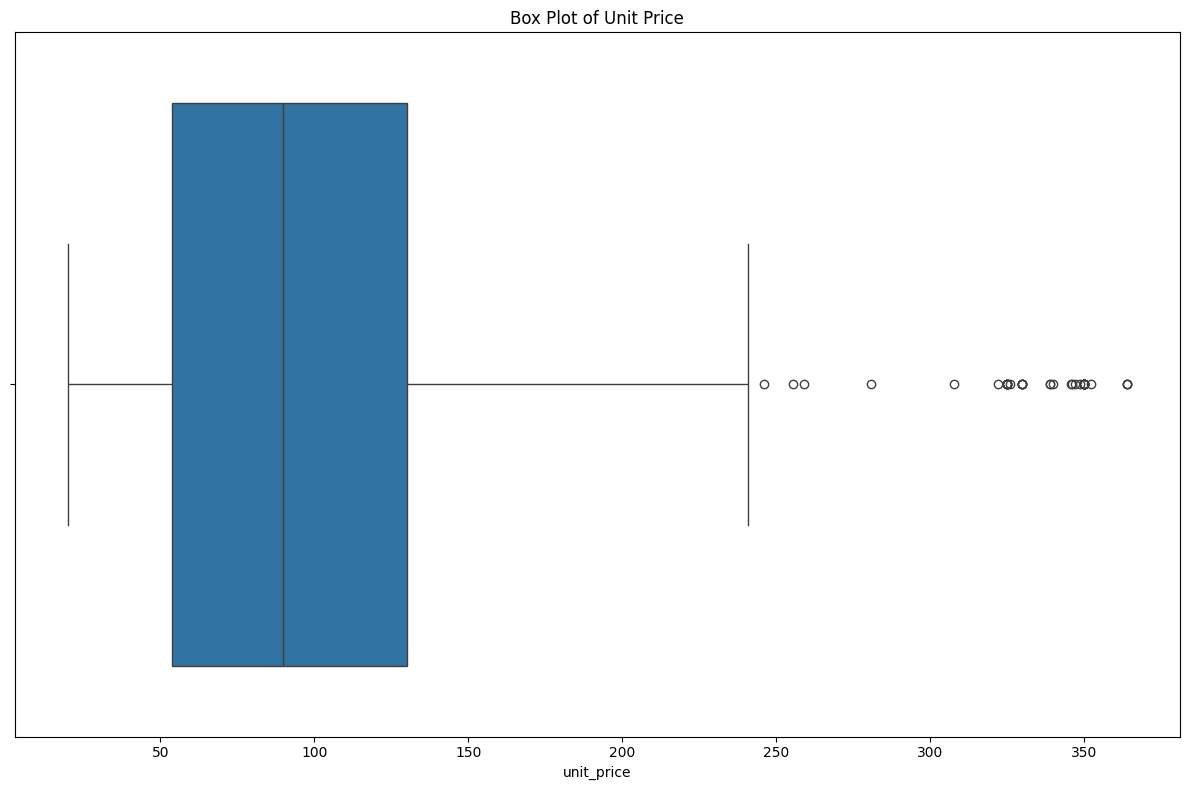

In [9]:
sns.boxplot(df, x='unit_price')
plt.title('Box Plot of Unit Price')
plt.tight_layout()

This code visualizes the relationship between the quantity sold (`qty`) and the total price (`total_price`) using a scatter plot with a regression line. The plot helps to identify trends or correlations between these two variables.

- `sns.regplot(df, x='qty', y='total_price', color='g')`: Creates a scatter plot of quantity vs. total price and fits a regression line, with points colored green.
- `plt.title('Quantity vs. Total Price')`: Adds a descriptive title to the plot.
- `plt.tight_layout()`: Adjusts the layout to prevent overlapping elements.

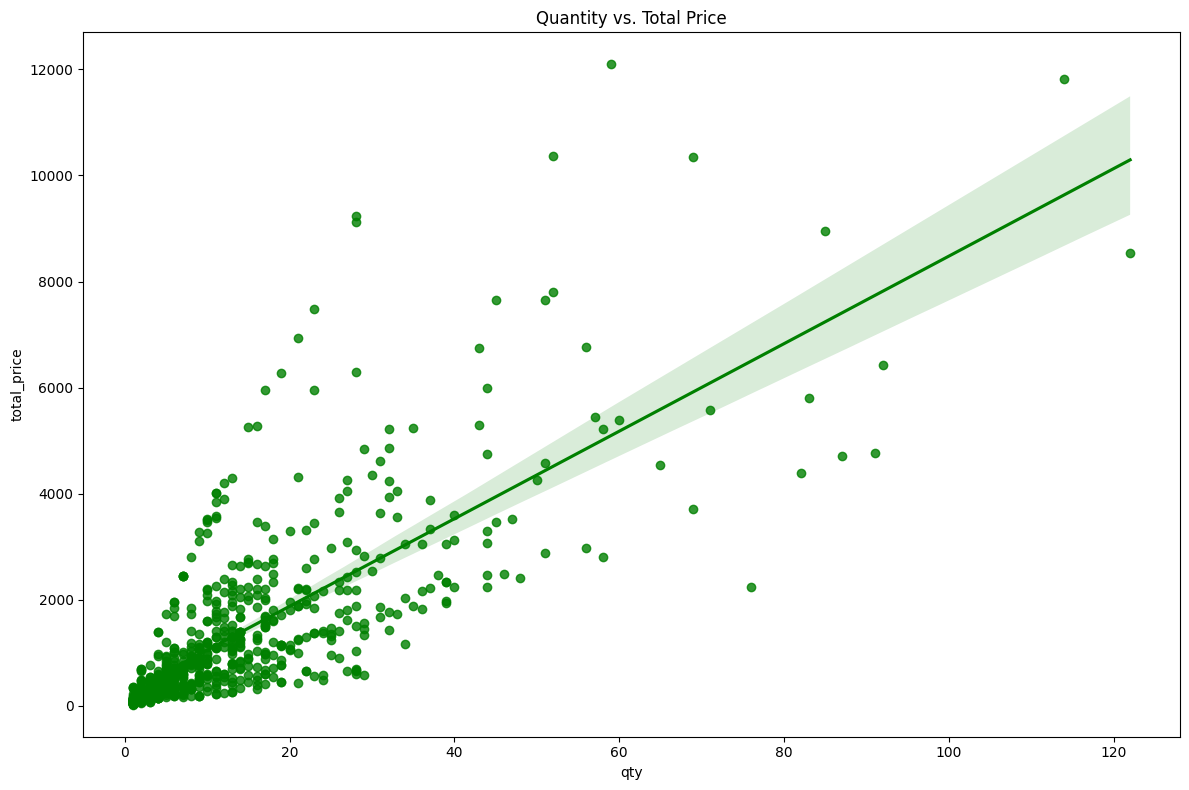

In [10]:
sns.regplot(df, x='qty', y='total_price', color='g')
plt.title('Quantity vs. Total Price')
plt.tight_layout()

This code creates a bar plot to visualize the average total price for each product category in the dataset. The bars are colored by product category using the 'viridis' palette, and the x-axis labels are rotated for better readability.

- `sns.barplot`: Plots the average `total_price` for each `product_category_name`, with colors indicating different categories.
- `plt.title`: Adds a descriptive title to the plot.
- `plt.xticks(rotation=30)`: Rotates x-axis labels for clarity.
- `plt.tight_layout()`: Adjusts layout to prevent overlapping elements.

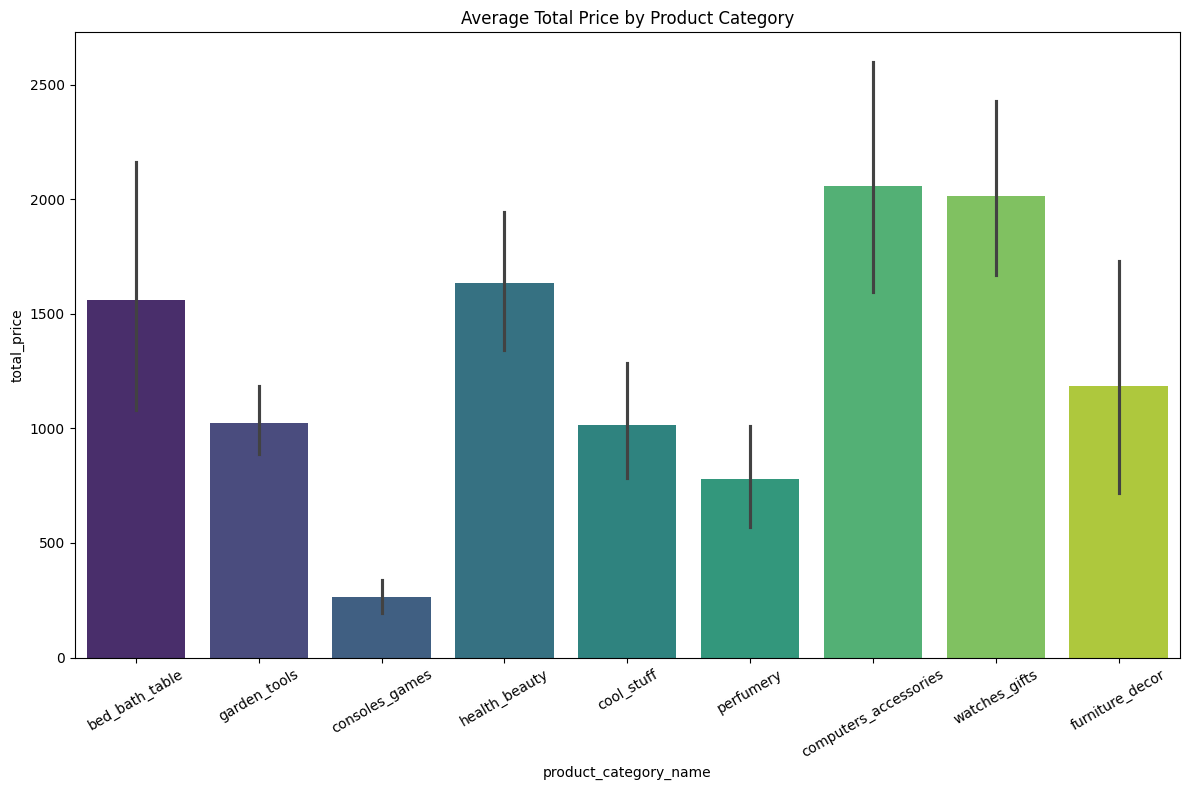

In [11]:
sns.barplot(
    df,
    x='product_category_name',
    y='total_price',
    hue='product_category_name',
    palette='viridis'
)
plt.title('Average Total Price by Product Category')
plt.xticks(rotation=30)
plt.tight_layout()

This code creates a box plot to visualize the distribution of `total_price` for `weekday`. The plot helps identify patterns, outliers, and differences in total price across weekdays.

- `sns.boxplot`: Plots box plots of `total_price` grouped by `weekday`, with colors indicating each weekday using the 'flare' palette.
- `plt.title`: Adds a descriptive title to the plot.
- `plt.tight_layout()`: Adjusts the layout to prevent overlapping elements.

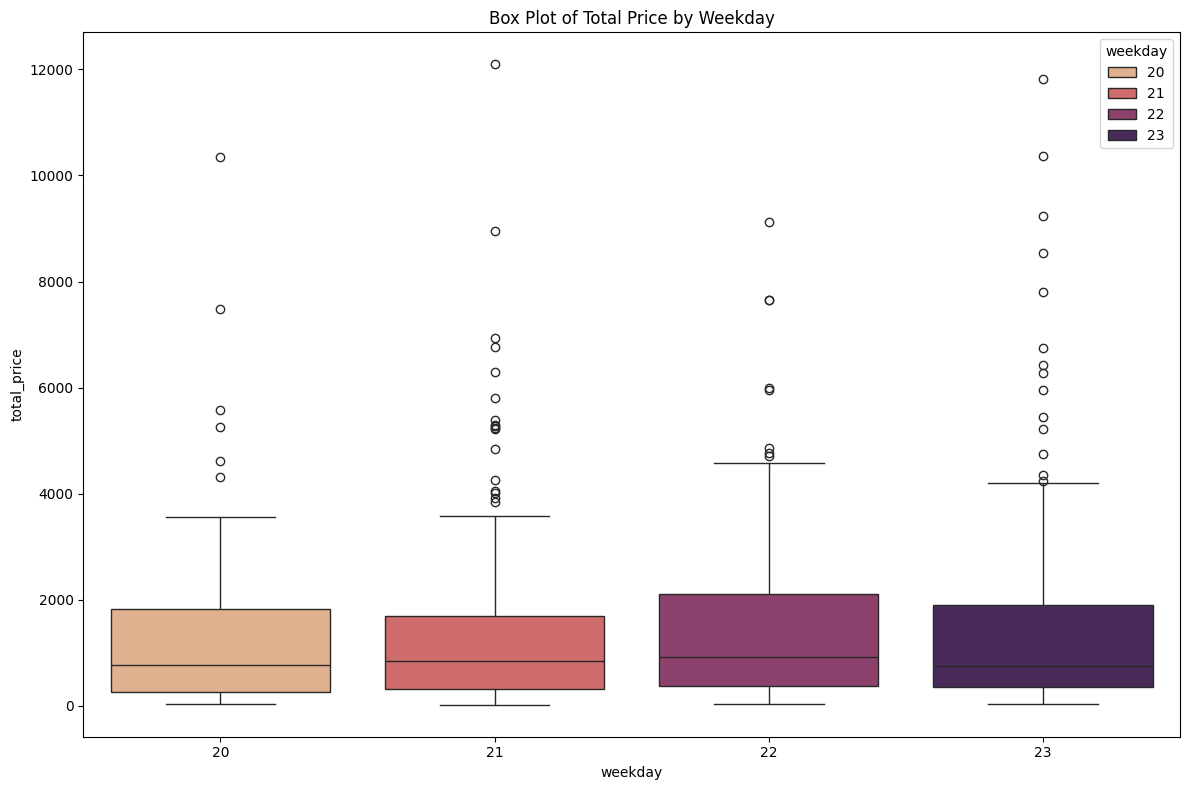

In [12]:
sns.boxplot(
    df,
    x='weekday',
    y='total_price',
    hue='weekday',
    palette='flare'
)
plt.title('Box Plot of Total Price by Weekday')
plt.tight_layout()

This code creates a box plot to visualize the distribution of `total_price` for each holiday in the dataset. The plot helps identify differences, patterns, and outliers in total price for holiday periods.

- `sns.boxplot`: Plots box plots of `total_price` grouped by `holiday`, with colors indicating holiday status using the 'crest' palette.
- `plt.title`: Adds a descriptive title to the plot.
- `plt.tight_layout()`: Adjusts the layout to prevent overlapping elements.

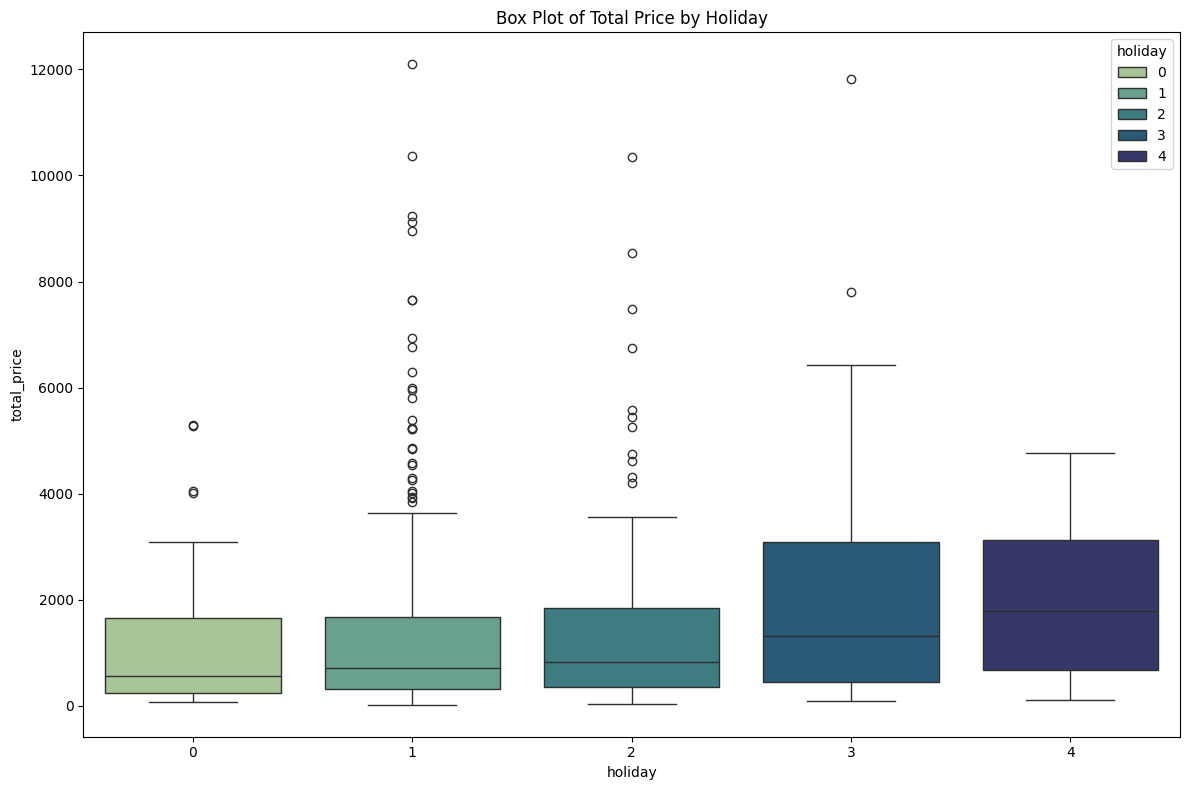

In [13]:
sns.boxplot(
    df,
    x='holiday',
    y='total_price',
    hue='holiday',
    palette='crest'
)
plt.title('Box Plot of Total Price by Holiday')
plt.tight_layout()

This code generates a heatmap to visualize the correlation between all numerical features in the dataset. The heatmap helps identify relationships and dependencies among variables, which is useful for feature selection and understanding data structure.

- `plt.figure(figsize=(12,12))`: Sets the figure size to 12x12 inches for better readability.
- `sns.heatmap(df.corr(numeric_only=True))`: Plots the correlation matrix of numerical columns as a heatmap.
- `plt.title`: Adds a descriptive title.
- `plt.tight_layout()`: Adjusts layout to prevent overlapping elements.

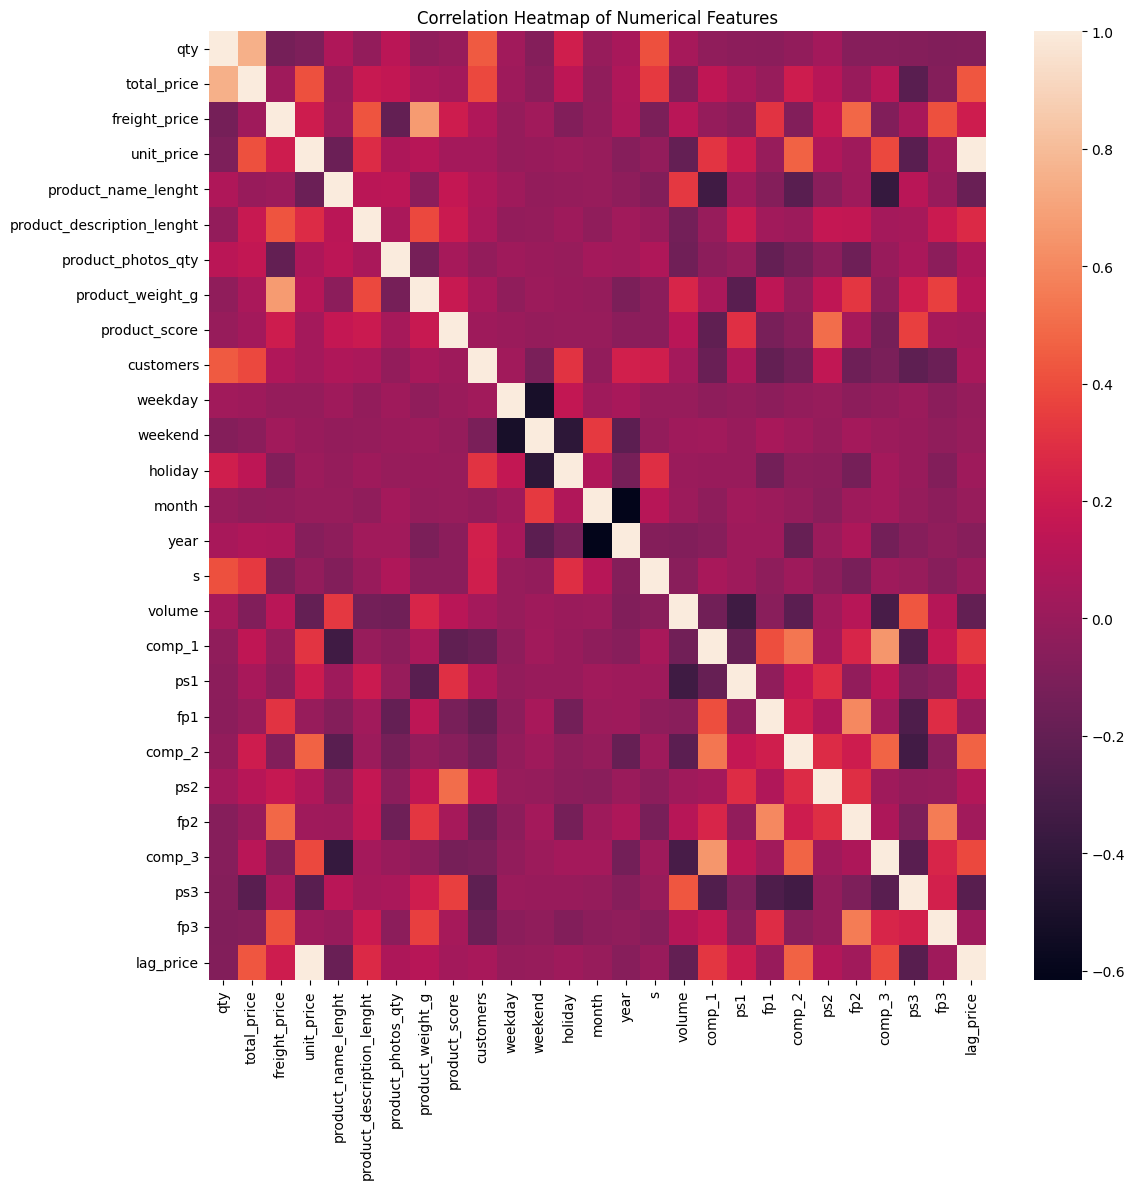

In [14]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True))
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()

## 3. Feature Engineering
In this section, I will perform feature engineering to create new features or modify existing ones to improve model performance.

### Creating Competitor Price Difference Features
The following code calculates the price difference between the unit price and each competitor's price for every product. These new features (`comp1_price_diff`, `comp2_price_diff`, `comp3_price_diff`) help quantify how much higher or lower the product's price is compared to its competitors, which can be useful for modeling and analysis.

In [15]:
df['comp1_price_diff'] = df['unit_price'] - df['comp_1']
df['comp2_price_diff'] = df['unit_price'] - df['comp_2']
df['comp3_price_diff'] = df['unit_price'] - df['comp_3']

### Visualizing Average Competitor Price Differences by Product Category

This code generates bar plots to visualize the average price difference between the product and each competitor, grouped by product category. Each subplot shows how the product's pricing compares to a specific competitor across different categories, helping to identify pricing strategies and competitive positioning.

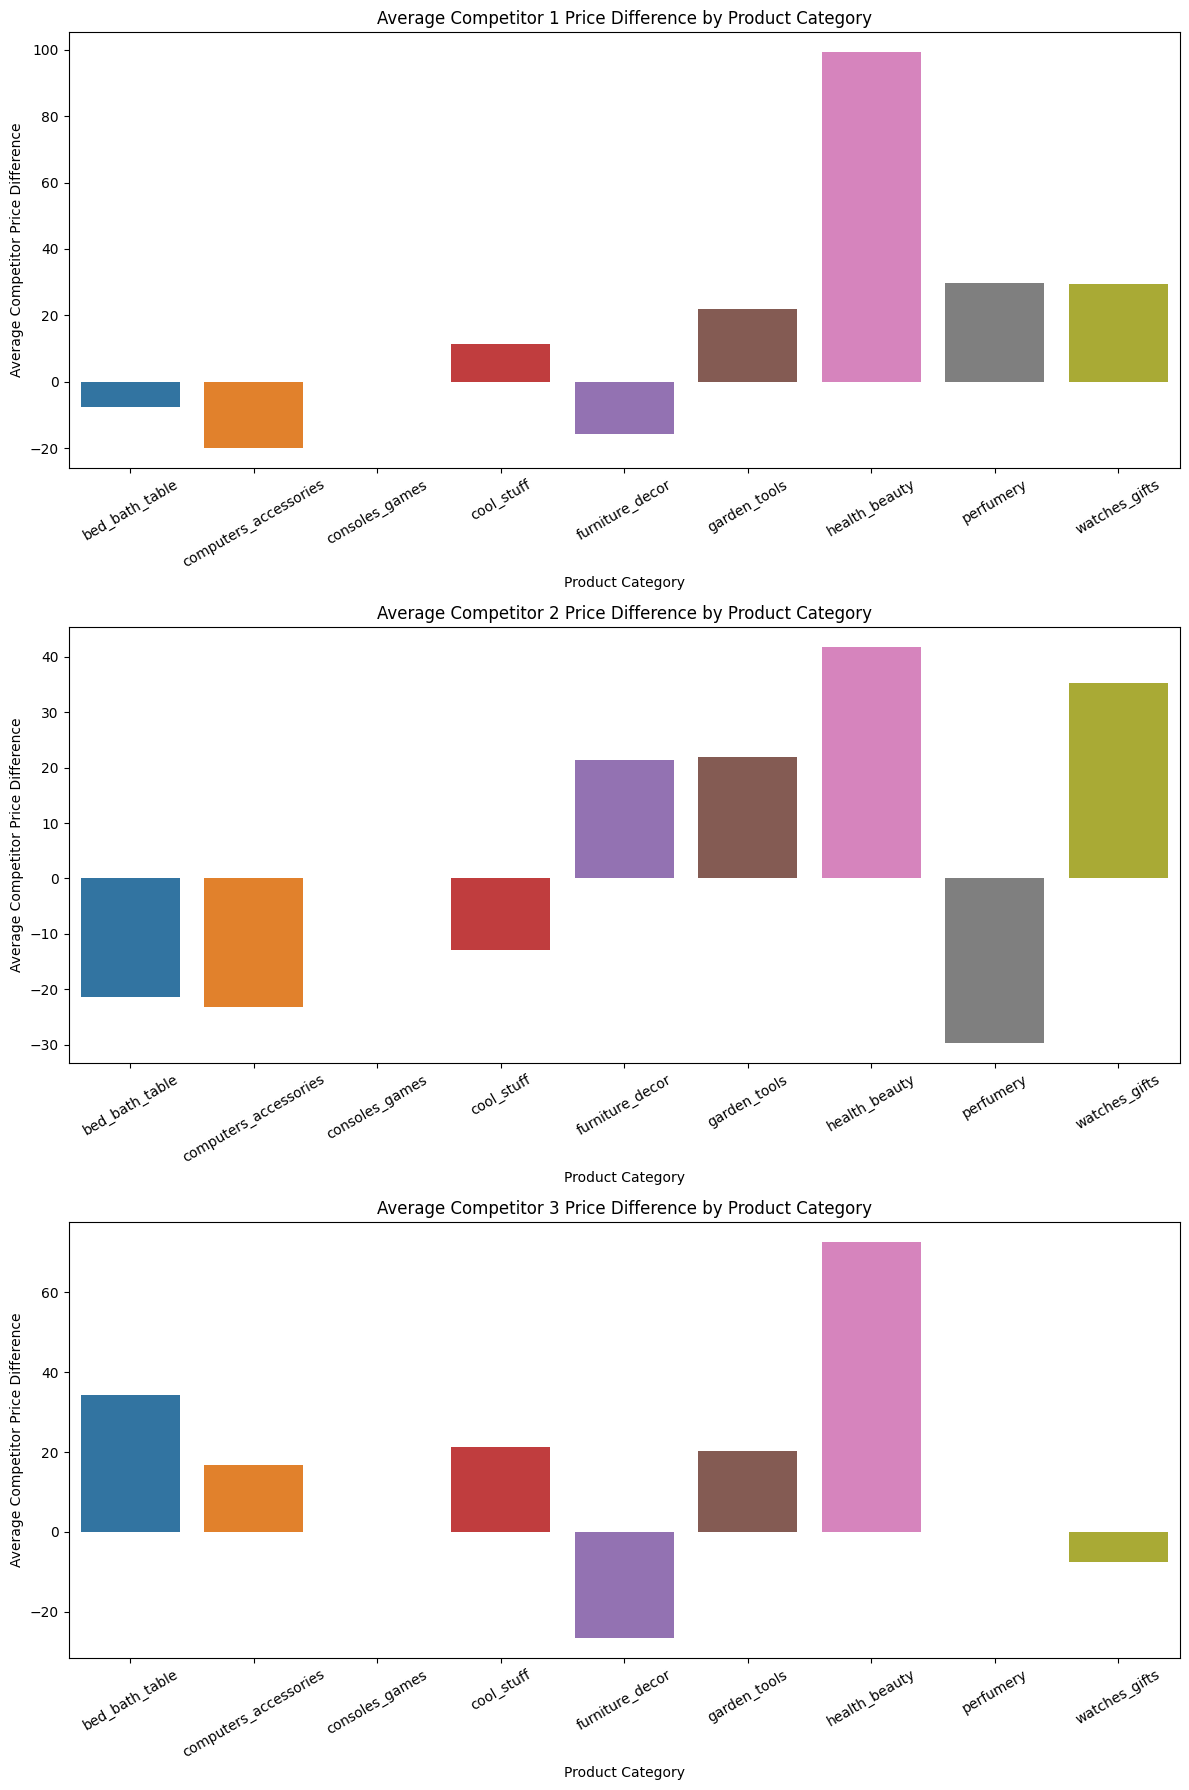

In [16]:
plt.figure(figsize=(12,18))
for i in range(1, 4):
    plt.subplot(3,1,i)
    avg_price_diff_by_category = df.groupby('product_category_name')[f'comp{i}_price_diff'].mean().reset_index()
    
    sns.barplot(
        avg_price_diff_by_category,
        x='product_category_name', 
        y=f'comp{i}_price_diff',
        hue='product_category_name'
    )
    plt.title(f'Average Competitor {i} Price Difference by Product Category')
    plt.xlabel('Product Category')
    plt.ylabel('Average Competitor Price Difference')
    plt.xticks(rotation=30)
plt.tight_layout()

## 4. Data Preprocessing
In this section, I will prepare the data for modeling, including handling categorical variables, scaling, and splitting into training and testing sets.

This code calculates the correlation of all numerical features in the dataset with the `total_price` column and sorts them in descending order. It helps identify which variables are most strongly related to total price, guiding feature selection and model building.

- `df.corr(numeric_only=True)`: Computes the correlation matrix for all numerical columns.
- `['total_price']`: Selects the correlations with the `total_price` column.
- `.sort_values(ascending=False)`: Sorts the correlations from highest to lowest.

In [17]:
df.corr(numeric_only=True)['total_price'].sort_values(ascending=False)

total_price                   1.000000
qty                           0.749605
lag_price                     0.426256
unit_price                    0.409001
customers                     0.386389
comp3_price_diff              0.348847
s                             0.334500
comp1_price_diff              0.318636
comp2_price_diff              0.306791
comp_2                        0.203050
product_description_lenght    0.175376
product_photos_qty            0.157945
comp_1                        0.144426
holiday                       0.136558
comp_3                        0.121114
ps2                           0.113178
year                          0.082140
product_weight_g              0.060092
ps1                           0.058941
product_score                 0.036119
freight_price                 0.025848
weekday                       0.018798
fp2                          -0.001240
product_name_lenght          -0.002594
fp1                          -0.006729
month                    

In [18]:
df['product_category_name'] = df.product_category_name.astype('category')

Select the features and target variable for the machine learning model:<br>
This step prepares the data for model training by defining the input features (`x`) and the output variable (`y`).

Our target variable is `total_price`, which we want to predict based on the selected features.

In [19]:
x = df[['qty', 'lag_price', 'unit_price', 'customers', 
        'comp1_price_diff', 'comp2_price_diff', 'comp3_price_diff',
       's', 'product_category_name']]
y = df['total_price']

We have a categorical feature `product_category_name`. I will convert it to numerical using one-hot encoding, which creates binary columns for each category.

In [20]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(x[['product_category_name']])
x_encoded = pd.DataFrame(
    encoder.transform(x[['product_category_name']]), 
    columns=encoder.get_feature_names_out(['product_category_name'])
)
x_encoded.index = x.index
x = pd.concat([x.drop('product_category_name', axis=1), x_encoded], axis=1)

Now, let's scale the features using `MinMaxScaler`. Scaling helps to normalize the feature values, ensuring that they are on a similar scale. This is important for many machine learning algorithms, as it can improve convergence and performance.

In [21]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

Split the data into training and testing sets using `train_test_split`. This allows us to train the model on one portion of the data and evaluate its performance on unseen data.
- `train_test_split(x, y, test_size=0.2, random_state=42)`: Splits the features (`x`) and target (`y`) into training (80%) and testing (20%) sets, with a fixed random state for reproducibility.

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 5. Modeling
In this section, I will train various regression models to predict optimal prices and evaluate their performance.

I write a function to build and evaluate different regression models. The function takes a train and test dataset, fits the model, makes predictions, and calculates performance metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²). It also visualizes the actual vs. predicted values using a scatter plot.

In [23]:
LR = LinearRegression()
R = Ridge()
L = Lasso()
ETR = ExtraTreeRegressor()
GBR = GradientBoostingRegressor()
KNN = KNeighborsRegressor(n_neighbors=5)
svr = SVR()

models = {
    "LinearRegression": LR,
    "Ridge": R,
    "Lasso": L,
    "ExtraTreeRegressor": ETR,
    "GradientBoostingRegressor": GBR,
    "KNeighborsRegressor": KNN,
    "SVR": svr
}


def evaluate(x_train, y_train, x_test, y_test):
    results = []
    for name, model in tqdm(models.items()):
        y_pred = model.fit(x_train, y_train).predict(x_test)
        
        results.append({
            "Model": name,
            "R2_Score": r2_score(y_test, y_pred),
            "MSE": mean_squared_error(y_test, y_pred),
            "RMSE": mean_squared_error(y_test, y_pred)**0.5
        })
    report = pd.DataFrame(results).sort_values('R2_Score', ascending=False)
    report.reset_index(drop=True, inplace=True)
    return report

Let's execute the function with different regression models to see how well they perform on our retail price optimization task.

In [24]:
evaluate(x_train, y_train, x_test, y_test)

  0%|          | 0/7 [00:00<?, ?it/s]

,Model,R2_Score,MSE,RMSE
0,GradientBoostingRegressor,0.965331,1.095162e+05,330.932330
1,ExtraTreeRegressor,0.956418,1.376713e+05,371.040777
2,LinearRegression,0.841049,5.021125e+05,708.598944
3,Lasso,0.840383,5.042186e+05,710.083536
4,Ridge,0.830096,5.367121e+05,732.606366
5,KNeighborsRegressor,0.679497,1.012446e+06,1006.203660
6,SVR,-0.056859,3.338535e+06,1827.165761


Now, we can see, the best model for our task is the **Gradient Boosting Regressor** with an R² score of approximately 0.96, indicating excellent predictive performance. This model effectively captures the relationship between the features and the target variable, making it a strong choice for retail price optimization.

## 6. Evaluation

Generate predictions on the test set using the best-performing model, and evaluate its performance. Then, visualize the relationship between the actual and predicted retail prices to assess how well the model fits the data and supports our retail price optimization objectives.

In [25]:
y_pred = GBR.predict(x_test)

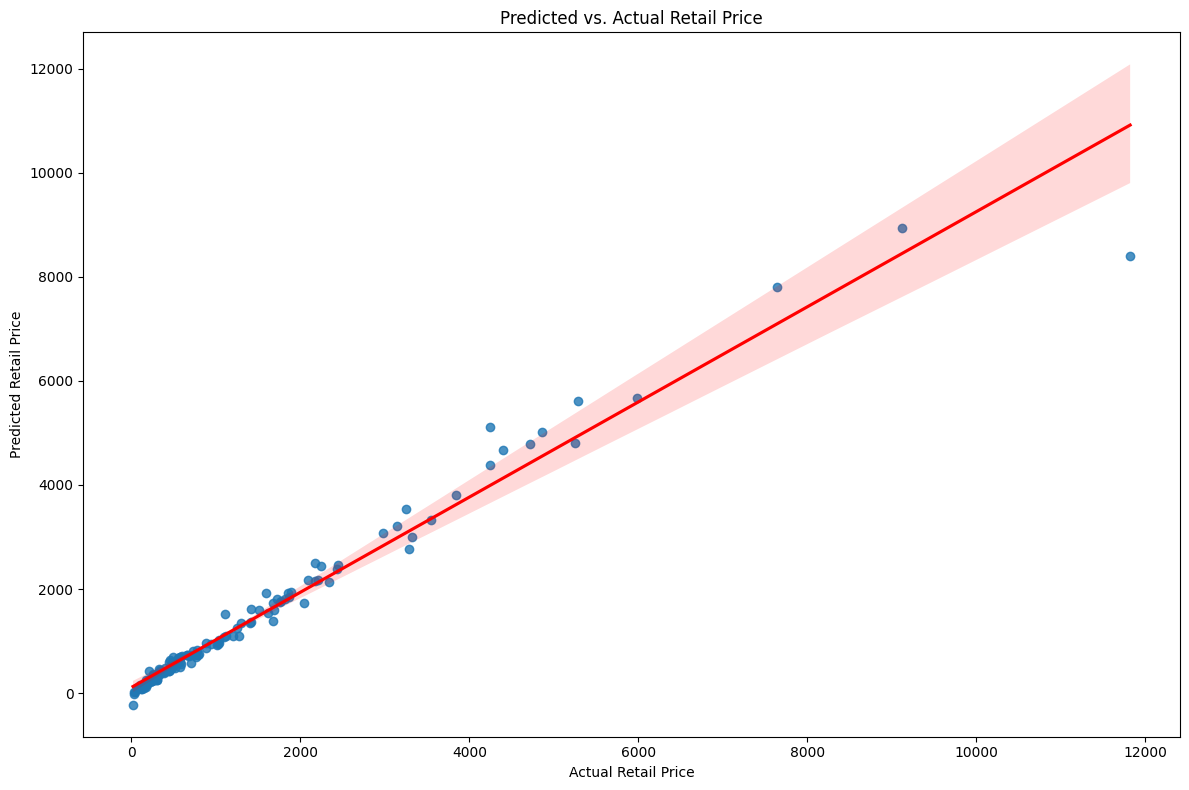

In [26]:
sns.regplot(x=y_test, y=y_pred, line_kws={'color': 'r'})
plt.title('Predicted vs. Actual Retail Price')
plt.xlabel('Actual Retail Price')
plt.ylabel('Predicted Retail Price')
plt.tight_layout()

This plot compares the actual retail prices to the prices predicted by the Gradient Boosting Regressor. Points close to the red regression line indicate accurate predictions, while deviations highlight areas where the model may under- or over-estimate. A tight clustering around the line suggests strong model performance and reliable price optimization.

### Save the model
With the model trained and evaluated, I will save it using `joblib` for future use. This allows me to easily load the model later without needing to retrain it, facilitating quick predictions on new data.

In [28]:
joblib.dump(GBR, 'model/retail_price_model.pkl')
joblib.dump(encoder, 'model/encoder.pkl')
joblib.dump(scaler, 'model/scaler.pkl')

['model/scaler.pkl']

## 7. Conclusion
In this notebook, we explored retail price optimization using machine learning techniques. The analysis identified key factors influencing pricing and demonstrated that the Gradient Boosting Regressor provides strong predictive performance for estimating optimal prices. For further optimization, future steps could include experimenting with additional features, testing other advanced models, and incorporating external data such as market trends or customer feedback to enhance pricing strategies.